In [ ]:
# The aim of this project is to choose a county in any state and count the new death cases and perform EDA on the dataset

In [2]:
#importing all packages and dataframe so that I can read the file

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd



df1 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv') 
df1




,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


In [2]:
#using df1.describe to print out statistical analysis on the file
df1.describe()


,fips,cases,deaths
count,927998.000000,9.367430e+05,916734.000000
mean,31272.235882,2.220427e+03,57.090916
std,16300.652394,1.163864e+04,461.272771
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.650000e+02,5.000000
75%,46101.000000,1.142000e+03,24.000000
max,78030.000000,1.004322e+06,25970.000000


In [3]:
#filtering out the row with Sweetwater which is the county I chose

f1=df1['county']=='Sweetwater'
f1

0         False
1         False
2         False
3         False
4         False
          ...  
936738     True
936739    False
936740    False
936741    False
936742    False
Name: county, Length: 936743, dtype: bool

In [4]:
# extracting the cases and deaths of  the Sweetwater county
df1[f1]

,date,county,state,fips,cases,deaths
10833,2020-03-24,Sweetwater,Wyoming,56037.0,1,0.0
12365,2020-03-25,Sweetwater,Wyoming,56037.0,1,0.0
14023,2020-03-26,Sweetwater,Wyoming,56037.0,1,0.0
15800,2020-03-27,Sweetwater,Wyoming,56037.0,1,0.0
17683,2020-03-28,Sweetwater,Wyoming,56037.0,1,0.0
...,...,...,...,...,...,...
923757,2021-01-12,Sweetwater,Wyoming,56037.0,3210,26.0
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
930248,2021-01-14,Sweetwater,Wyoming,56037.0,3250,26.0
933493,2021-01-15,Sweetwater,Wyoming,56037.0,3262,26.0


In [23]:
#calculating 30 days of cases in Sweetwater
df1[f1].tail(30)



,date,county,state,fips,cases,deaths
842626,2020-12-18,Sweetwater,Wyoming,56037.0,2696,15.0
845872,2020-12-19,Sweetwater,Wyoming,56037.0,2702,15.0
849117,2020-12-20,Sweetwater,Wyoming,56037.0,2718,15.0
852362,2020-12-21,Sweetwater,Wyoming,56037.0,2762,15.0
855607,2020-12-22,Sweetwater,Wyoming,56037.0,2780,15.0
858852,2020-12-23,Sweetwater,Wyoming,56037.0,2820,15.0
862097,2020-12-24,Sweetwater,Wyoming,56037.0,2820,15.0
865342,2020-12-25,Sweetwater,Wyoming,56037.0,2820,15.0
868587,2020-12-26,Sweetwater,Wyoming,56037.0,2845,15.0
871832,2020-12-27,Sweetwater,Wyoming,56037.0,2854,15.0


In [24]:
#calculating daily count of new cases and new deaths in Sweetwater
count_series=df1[f1].groupby(['deaths','cases']).size()
count_series

deaths  cases
0.0     1        6
        2        2
        3        3
        4        1
        5        3
                ..
26.0    3210     1
        3222     1
        3250     1
        3262     1
        3280     1
Length: 223, dtype: int64

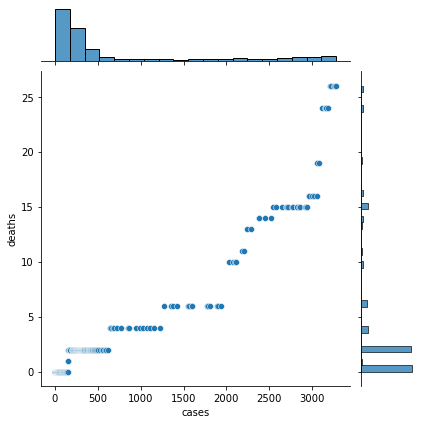

In [35]:
# exploratory data analysis 
# graph showing cases abd deaths of Sweetwater
sns.jointplot(x='cases',y='deaths',data=df1[f1])

In [5]:
#Creating a filter for Wyoming

f2=df1['state']=='Wyoming'
f2
            

0         False
1         False
2         False
3         False
4         False
          ...  
936738     True
936739     True
936740     True
936741     True
936742     True
Name: state, Length: 936743, dtype: bool

In [6]:
#filtering out each column for Wyoming
df1[f2]

,date,county,state,fips,cases,deaths
1363,2020-03-11,Sheridan,Wyoming,56033.0,1,0.0
1618,2020-03-12,Sheridan,Wyoming,56033.0,1,0.0
1932,2020-03-13,Fremont,Wyoming,56013.0,1,0.0
1933,2020-03-13,Sheridan,Wyoming,56033.0,1,0.0
2307,2020-03-14,Fremont,Wyoming,56013.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


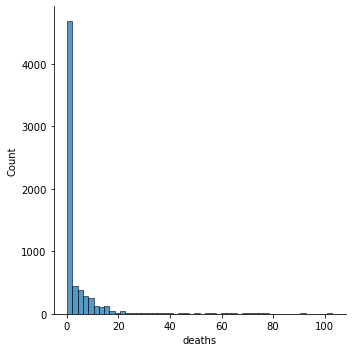

In [10]:
#Creating a graph for Wyoming's death cases which will be compared with Illiniois in the next cell
sns.displot(df1[f2]['deaths'],bins=50)

In [8]:
#filtering out illinois
f3=df1['state']=='Illinois'
f3
       
df1[f3]

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0
...,...,...,...,...,...,...
934195,2021-01-16,Whiteside,Illinois,17195.0,5342,173.0
934196,2021-01-16,Will,Illinois,17197.0,57707,867.0
934197,2021-01-16,Williamson,Illinois,17199.0,6119,115.0
934198,2021-01-16,Winnebago,Illinois,17201.0,26094,407.0


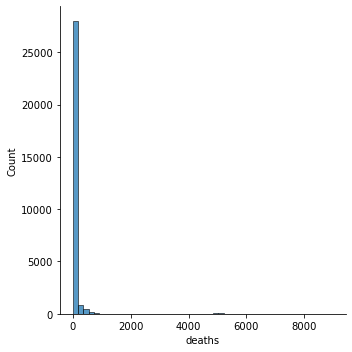

In [11]:
#creating a graph for illinois's death cases
sns.displot(df1[f3]['deaths'],bins=50)

Conclusion

I chose to create two separate graphs for Illinois and Wyoming so that I can compare the total number of deaths as a result of covid19.
It appears as if Illinois has a larger number of deaths than Wyoming and both graphs are rightly skewed.